In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# HW_05 - Customer wait time

In the [waiting for bus](./bus_wait.ipynb) example, we saw a difference between how long we expect the bus interval to be vs how long we _experience_ a bus interval to be. 

Now, consider creating parts on demand for customers. We'll take an example of [folding a paper airplane](https://hackmd.io/@cooperrc/HkISHYNrC/edit). We need some data to start:

1. Follow the paper airplane instructions and make one airplane
2. Edit the instructions to make it easier to follow
3. With your new process: time yourself making one airplane at-a-time and make 5 or 6 airplanes
4. With one hand, try to make a paper airplane and time the process (time process this at least 2 times)

## What is this data meant to show

We, engineers, often prescribe processes and procedures that seem to make sense, but can ignore the people that need to do the work. The process of create-try-edit-repeat should be an integral part of your writing and design process. The one-handed folding procedure could simulate many scenarios:
- someone multitasking
- someone with an injury/unuseable hand
- anything else?

When we consider a process, its important to think about the different people that are required to make the process happen. 

## Next steps

With your times recorded, you can use the average and standard deviations to find the times when parts will be ready as a function of time. Use the difference between the predicted and observed cumulative distribution functions to  predict how long your customers will have to wait on paper airplanes. 

In [3]:
N_assemblies = 1000


part_times = [3.25, 1.75, 1.25, 1, 1, 2.5, 2.5]
print(part_times)

'''
3m12s
1m 39s
1m 12s
1m06s
1m 02s

2m24s
2m 32s'''

[3.25, 1.75, 1.25, 1, 1, 2.5, 2.5]


'\n3m12s\n1m 39s\n1m 12s\n1m06s\n1m 02s\n\n2m24s\n2m 32s'

1.8928571428571428
0.8112726208286104


Text(0.5, 0, 'time between parts (min)')

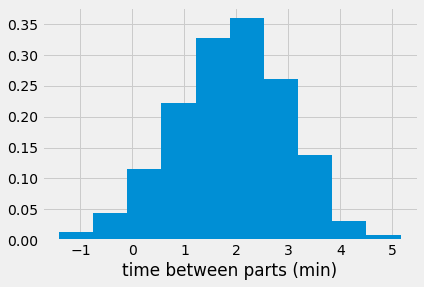

In [4]:
rng = default_rng(42)

std_part_time = np.std(part_times)
average_part_time = np.mean(part_times)
print(average_part_time)
print(std_part_time)

part_times_normal= np.arange(1, N_assemblies+1)*average_part_time

part_times_normal += rng.normal(loc = 0, 
                         scale = std_part_time, 
                         size = N_assemblies)

# print(part_times_normal)


plt.hist(np.diff(part_times_normal), density=True)
plt.xlabel('time between parts (min)')

Text(0.5, 0, 'minutes between parts')

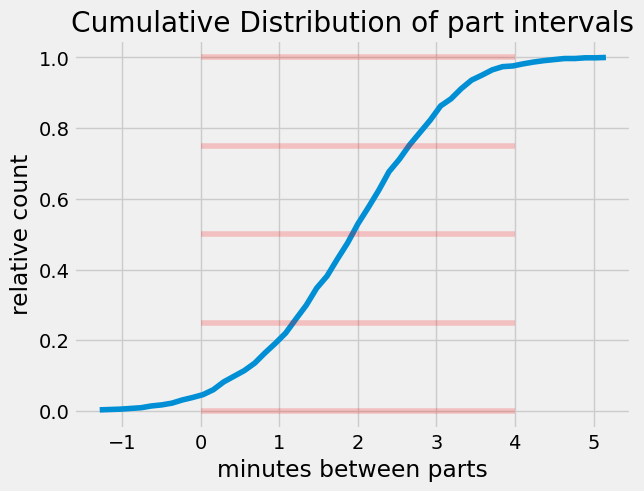

In [16]:
part_ready = part_times_normal
part_time_diff = np.diff(part_times_normal)

count, bins_count = np.histogram(part_time_diff, bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf)
plt.hlines([0, 0.25, 0.5, 0.75, 1], 
           0, 
           4, 
          alpha = 0.2, 
          colors = 'r')
plt.title('Cumulative Distribution of part intervals')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

In [17]:
num_people = 500
people_arrival = rng.random(num_people)*N_assemblies

In [18]:
person_wait = np.zeros(len(people_arrival))
obs_part_interval = np.zeros((len(part_ready), 2))
for i, part_time in enumerate(part_ready[:-1]):
    people_get_part = np.size(people_arrival[
        np.logical_and(people_arrival>=part_time,
                       people_arrival<part_ready[i+1])])
    obs_part_interval[i, 0] = part_ready[i+1] - part_time
    obs_part_interval[i, 1] = people_get_part

In [19]:
obs_part_interval = obs_part_interval[obs_part_interval[:, 0].argsort()]

Text(0.5, 0, 'minutes between parts')

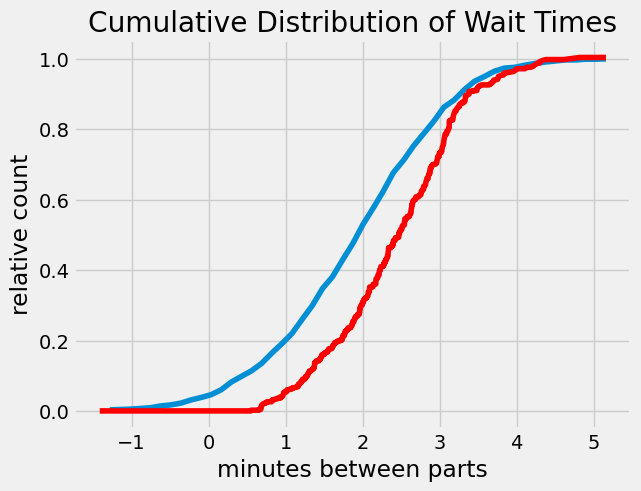

In [22]:
plt.plot(bins_count[1:], 
         cdf,
         label = 'CDF measured'
        )

cdf_obs = np.cumsum(obs_part_interval[:, 1])/num_people

plt.plot(obs_part_interval[:, 0], 
         cdf_obs, 
         'r-',
        label = 'CDF observed')

# plt.hlines([0, 0.25, 0.5, 0.75, 1], 
#            20, 
#            100, 
#           alpha = 0.2, 
#           colors = 'r')
plt.title('Cumulative Distribution of Wait Times')
plt.ylabel('relative count')
plt.xlabel('minutes between parts')

# User-Centric Engineering Processes in Design Report

## Introduction

Engineering reports often focus on optimizing technical efficiency and theoretical models, which can sometimes overlook crucial human factors. This oversight is demonstrated in an experiment involving paper airplane folding. Simplifying the folding instructions decreased the average time per airplane but increased variability in completion times. Additionally, introducing the physical constraint of of folding the paper with one hand added more of a human factor and more variability to the data. This variability in production times of paper airplane due to human factors can allow us to see the inspection paradox, highlighting how the expected wait time for a folded paper airplane can differer from the observed wait time. 

This study aims to evaluate the distribution of wait times in the process of folding paper airplanes under different constraints, using cumulative distribution functions (CDFs) for analysis. While emphasizing the importance of the create-try-edit-repeat cycle in process design, this report shows how the variations in process time can lead to longer observed customer wait times even when the average time decreases to make a paper airplane.

## Methods

The experiment begins with following a set of instructions to make a paper airplane, followed by revisions to enhance clarity and ease. After making and timing five to six airplanes using the refined process, the task repeats under a significant constraint: folding the airplanes with just one hand. This modification simulates real-life challenges such as multitasking or physical impairments, directly impacting a worker's ability to perform tasks efficiently. The methods implemented are described below:

1. **Data Collection**:
   - **Two-Handed Folding**: Participants were first instructed to fold paper airplanes using both hands. They followed a standard set of instructions to fold five to six airplanes, timing each folding process.
   - **One-Handed Folding**: Subsequently, the same participants folded paper airplanes using only one hand. This task was repeated at least two times to simulate conditions such as multitasking or physical impairment.

2. **Data Processing**:
   - For both the two-handed and one-handed folding methods, the intervals between completed airplanes were recorded.
   - All of the times were combined and the average and standard deviation was found. These values were used to simulate a normal distribution of random data by using a random number generator through numpy.

3. **Plotting the CDF**:
   - **Measured CDF**: The cumulative distribution function of the simulated times of folding was plotted. The `bins_count` array provides the interval edges, and `cdf` represents the cumulative probabilities at each bin.
   - **Observed CDF**: A separate CDF for the observed data (`cdf_obs`) was plotted in red. This represents the cumulative observed frequencies, computed as the cumulative sum of the observed intervals normalized by the total number of observations (`num_people`).

4. **Graph Formatting**:
   - The graph was titled "Cumulative Distribution of Wait Times" to reflect the focus of the study.
   - The x-axis was labeled "minutes between parts," indicating the time intervals between the completion of each paper airplane.
   - The y-axis was labeled "relative count," showing the proportion of total airplanes completed at each time.
  
  

## Results/Discussion

Recording the times for these exercises provides crucial data. Folding times recorded during the two-handed folding process were as follows:

1 | 3 minutes 12 seconds

2 | 1 minute 39 seconds

3 | 1 minute 12 seconds

4 | 1 minute 6 seconds

5 | 1 minute 2 seconds. 

When folding with one hand, times increased to:

1 | 2 minutes 24 seconds

2 | 2 minutes 32 seconds

In total, these times had an average of 1.8928571428571428 and a stgandard deviation of 0.8112726208286104 and were used to create a normal distribution of times that represented a simulation of how long it would take to finsh a part.

You can see that the one hand folding times were recorded after the process was optimized, yet are more than 1 minute slower than the optomized two hard times. This shows how a physical constraint like folding with one hand instead of two (due to a disability or even multitasking) can increase folding times.

Next using cumulative distribution functions (CDFs) offers a graphical representation of part completion times for analysis. The experiment included plotting the predicted CDF based on a normal distribution model against the observed CDF derived from actual data. In the plot above, the blue simulated CDF curve shows the relative number of assemblies finished at a specific time. The red observed CDF shows the relative number of customers that experienced that specific wait time for their paper airplane to be folded. This comparison shows the inspection paradox and illustrates that the observed time for someone waiting is actually more likely to me higher than what is expected from the histogram of wait times. The predicted CDF, based on a normal distribution model, suggested smoother and faster completion times. To illustrate this difference take 50th percentile wait time in the CDF. Based on the data in the histogram, we would expect that a person waiting for a paper airplane to be folded would need to wait 2 minutes. However in reality, due to the inspection paradox, the 50th percentile wait time as measured by the observer is 2.5 minutes (25% larger).

These results underscore the importance of accounting for real-world variability and human factors when modeling processes. 


## Conclusion

This study effectively demonstrated the significant impact of human factors on engineering process design through the task of folding paper airplanes. Recorded times with an average of 1.8928571428571428 and a standard deviation of 0.8112726208286104 were used to simulate a larger sample of folding times through a normal distribution. By simulating a larger sample and applying cumulative distribution functions, we quantified the variations in wait times caused by the physcial constraints of one handed folding as well as an improving procedure as the folding went on. Through these CDFs, we were able to observe the inspection paradox, explaining why the expected 50th percentile wait time was 2 minutes, but the 50th percentile observed wait time was 25% larger at 2.5 minutes.

These quantitative findings underscore the necessity of incorporating user-centric perspectives in engineering designs to bridge the gap between theoretical expectations and actual outcomes. This approach not only enhances process efficiency but also ensures that the designs are realistically adaptable and inclusive, catering to a broader range of user scenarios. It emphasizes the crucial aspect of engineering: considering the end-user.

### Future Studies
Future studies could further explore the impact of diverse physical constraints on engineering processes by introducing additional variables such as visual impairments. For instance, experiments could add more variability through physical constraints like folding paper airplanes with one eye closed or in low or no-light conditions. 

Feedback on previous submission:
> **Cooper**: This is a pretty broad paragraph. Its OK to have it her, but give a _big result_ that you're leading towards e.g. variations in process time lead to long customer wait times even when the average time decreases. 

> **Cooper**: I like the connection you're drawing between variables in the timed method to real processes. This might be good to mention in that first paragrpah too. 

> **Cooper**: I updated the CDFs with more assemblies+customers here. Try interpreting the graphs here e.g. the simulated CDF curve shows the relative number of assemblies finished within a given time. The observed CDF shows the relative number of customers that experienced these intervals of assembly times. 

> **Cooper**: what is your measured effect on performance? how are you defining "performance"? I think "constraint" is specifically the one-hand constraint, but are you claiming this is widely applicable e.g. closing one eye? low/no-light conditions?

> **Cooper**: these last couple paragraphs are getting pretty broad again. There's still more details you can focus on to define specific and measurable outputs from this analysis. Try to describe specific numbers in the plots (CDFs) that highlight important points you're trying to make.